In [1]:

%load_ext autoreload

%autoreload 2

In [2]:
import os
import json
from collections import Counter
import csv
from compmusic import dunya
from music21 import*
import matplotlib.pyplot as plt
import numpy as np
dunya.set_token("52fc6ac49c0b7fc9644404aaf4f9bc1a7088d69d")

import sys
sys.path.append('../src/')
import patterns_per_nawba as pn
import nawba_centones
data_path = '../data'

In [27]:
# Nawba Mappings to centones
nawba_centones_lookup = nawba_centones.load_and_parse_centones_mapping(os.path.join(data_path, 'centones_nawba.csv'))
# Nawba Mappings to tabs
nawba_tabs = nawba_centones.load_and_parse_nawba_tabs(os.path.join(data_path, 'nawba_tabs.json'))
mbid_tab_lookup = pn.mbids_per_tab()
mbid_nawba_lookup = pn.mbids_per_nawba(mbid_tab_lookup, nawba_tabs)
    

In [28]:
# for now we will just work with the scores from al-maya tab
scores = tab_mbid_lookup['al-māya']
score_annotations_lookup = pn.score_annotations_lookup()

In [30]:
path = '/home/miguelgc96/Desktop/a451a7fc-c53f-462a-b3fc-4377bb588105.json'
mbid = 'a451a7fc-c53f-462a-b3fc-4377bb588105'
m21patterns = pn.get_m21_patterns(path, mbid)

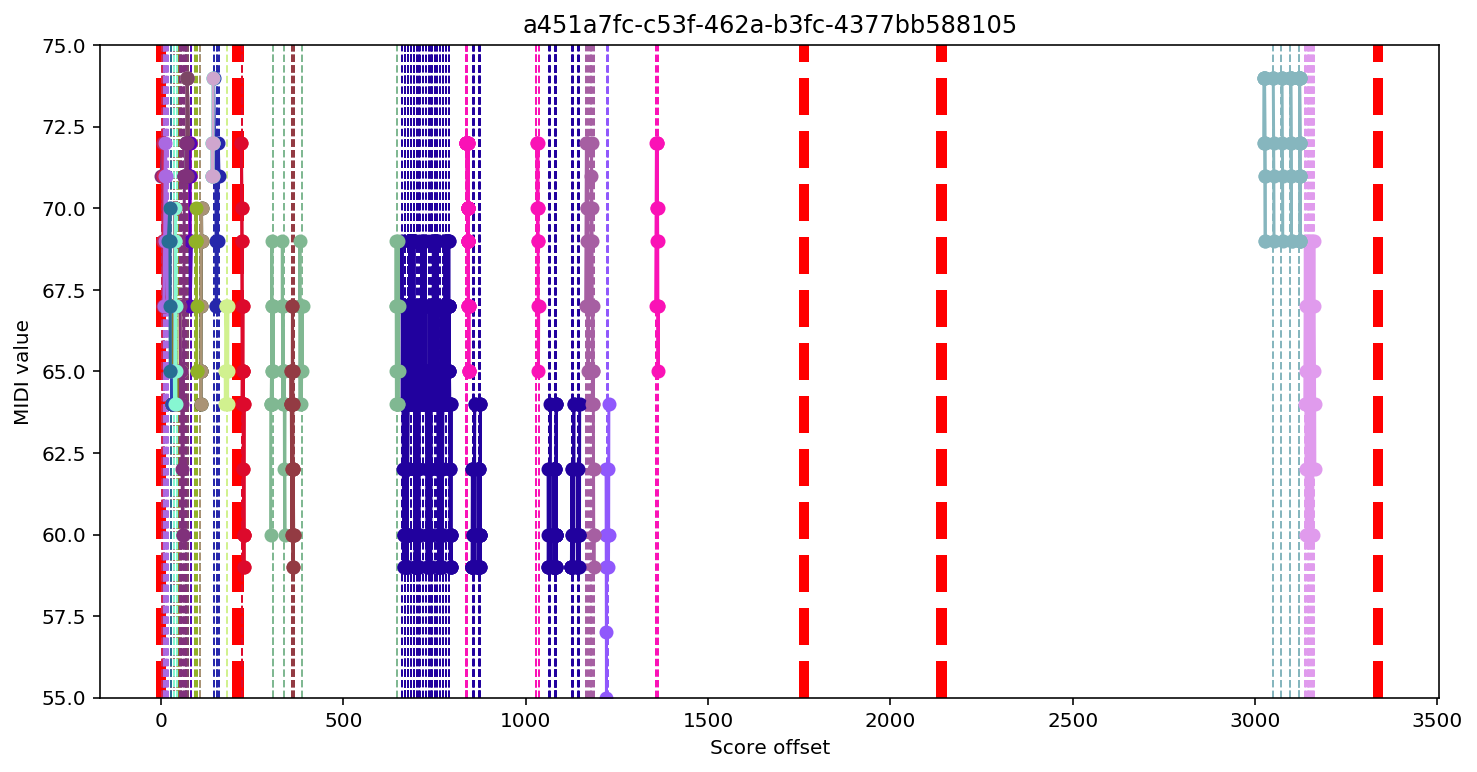

In [31]:
fn = '../data/scores_xml/a451a7fc-c53f-462a-b3fc-4377bb588105.xml'
s = converter.parse(fn)
p = s.parts[0]
notes = p.flat.notesAndRests.stream()
last_midi_offset = notes[-1].offset
plt.figure(figsize=(12, 6))
for section in score_annotations_lookup[mbid]:
    section_offset = float(score_annotations_lookup[mbid][section])
    if section_offset < last_midi_offset:
        plt.vlines(section_offset, 55, 75, color='red', label=section, linewidth=5, linestyle='dashed')

for idx in m21patterns['SiaTonic1']:
    color = np.random.rand(3,)
    for pattern in m21patterns['SiaTonic1'][idx]:
        p = pattern
        notes = p.flat.notesAndRests.stream()
        midi_offset = [note.offset for note in notes if not note.isRest]
        midi_values = [note.pitch.midi for note in notes if not note.isRest]
        plt.plot(midi_offset, midi_values, '-o', c=color)
        silence_offset = [note.offset for note in notes if note.isRest]
        plt.vlines(silence_offset, 55, 75, color=color,linewidth=1, linestyle='dashed')
#plt.legend()
plt.xlabel('Score offset')
plt.ylabel('MIDI value')
plt.title(mbid)
plt.ylim(55,75)
plt.show()